#### Обработка данных

In [36]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go

from scipy import optimize as opt 
import scipy
import scipy.odr as odr

from statsmodels.stats.weightstats import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/heyfaraday/anaconda/envs/new2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy



In [37]:
data = pd.read_csv('data/experiment.csv') # Считываем данные

In [38]:
data.head # Посмотрим на несколько значений

<bound method DataFrame.head of       I     B   U1   U2   U3   U4   U5   U6   U7   U8   U9
0  1.40  1041  270  361  451  541  629  717  809 -898  898
1  1.11   955  245  331  412  491  569  649  732 -810  815
2  0.88   867  213  291  355  426  496  568  638 -711  728
3  0.69   717  180  241  295  351  408  471  533 -574  587
4  0.44   487  117  160  195  236  272  318  359 -377  401
5  0.26   304   70  103  124  151  171  193  217 -225  252>

Выровняем значения измеренного напряжение по $U_0$

In [39]:
data['U1'] = data['U1'] - 10
data['U2'] = data['U2'] - 13
data['U3'] = data['U3'] - 14
data['U4'] = data['U4'] - 17
data['U5'] = data['U5'] - 19
data['U6'] = data['U6'] - 20
data['U7'] = data['U7'] - 23

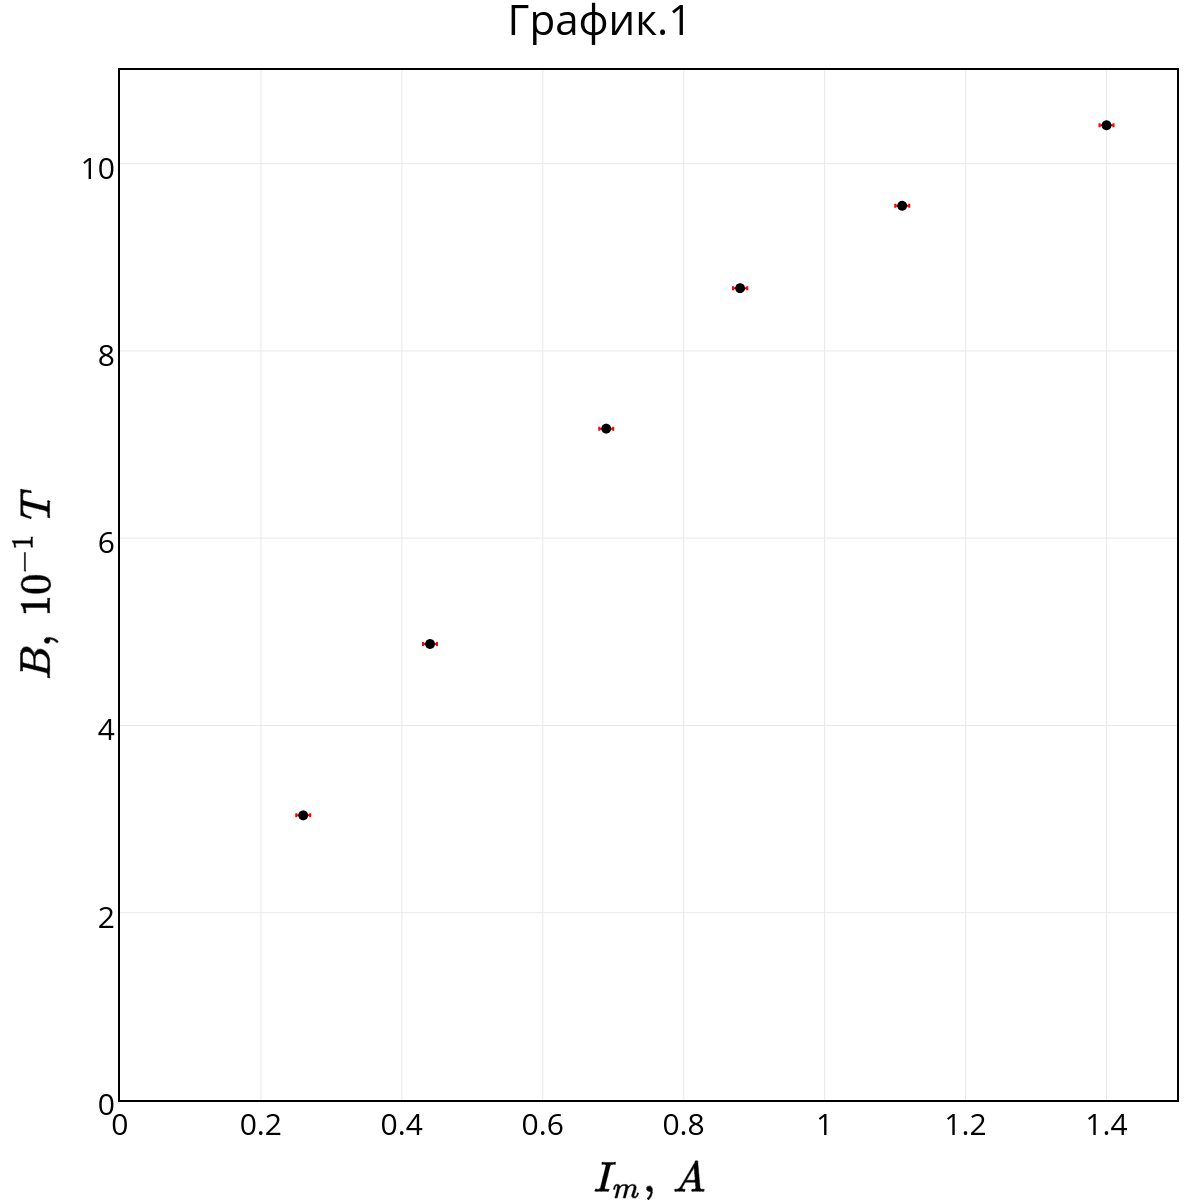

In [40]:
trace1 = go.Scatter(
    x = data['I'],
    y = data['B']/100,
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)


trace0 = [trace1]

layout = go.Layout(
    showlegend=False,
    legend=dict(
        #x=0.9,
        #y=1
        orientation= "h"
    ),
    title = "График.1",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$I_m,~A$',
        range = [0.0, 1.5],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$B,~10^{-1}~ T$',
        range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

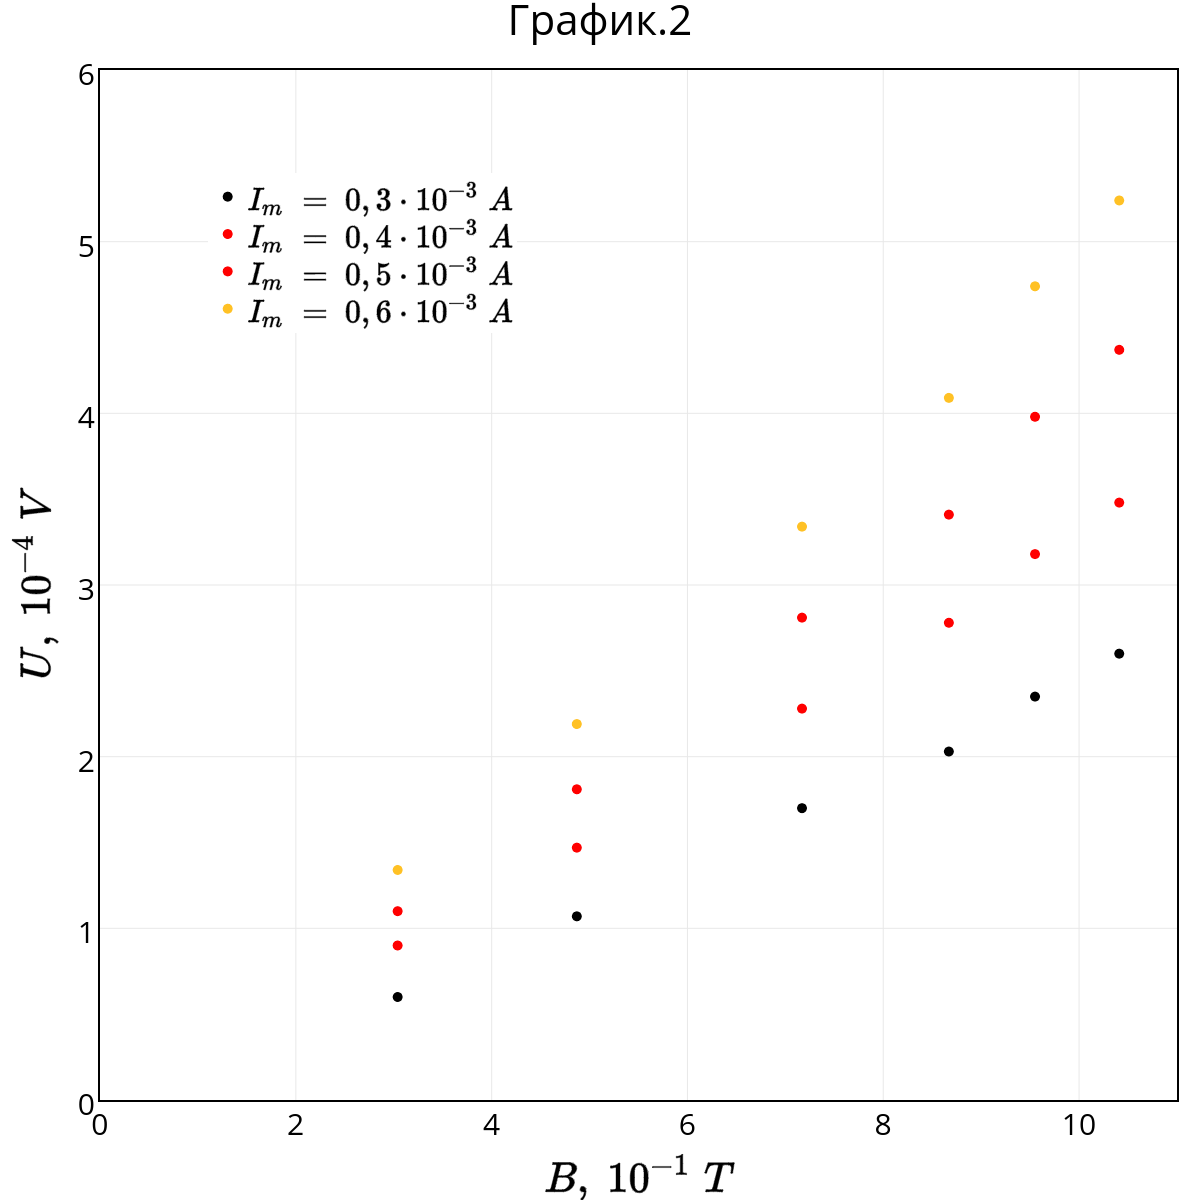

In [41]:
trace1 = go.Scatter(
    y = data['U1']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,3\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    )
)
trace2 = go.Scatter(
    y = data['U2']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,4\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    )
)
trace3 = go.Scatter(
    y = data['U3']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,5\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    )
)

trace4 = go.Scatter(
    y = data['U4']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,6\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ffc125'
    ),
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    )
)

trace0 = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=True,
    legend=dict(
        x=0.1,
        y=0.9
        #orientation= "h"
    ),
    title = "График.2",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$B,~10^{-1}~ T$',
        range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$U,~10^{-4}~V$',
        range = [0, 6],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 100,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

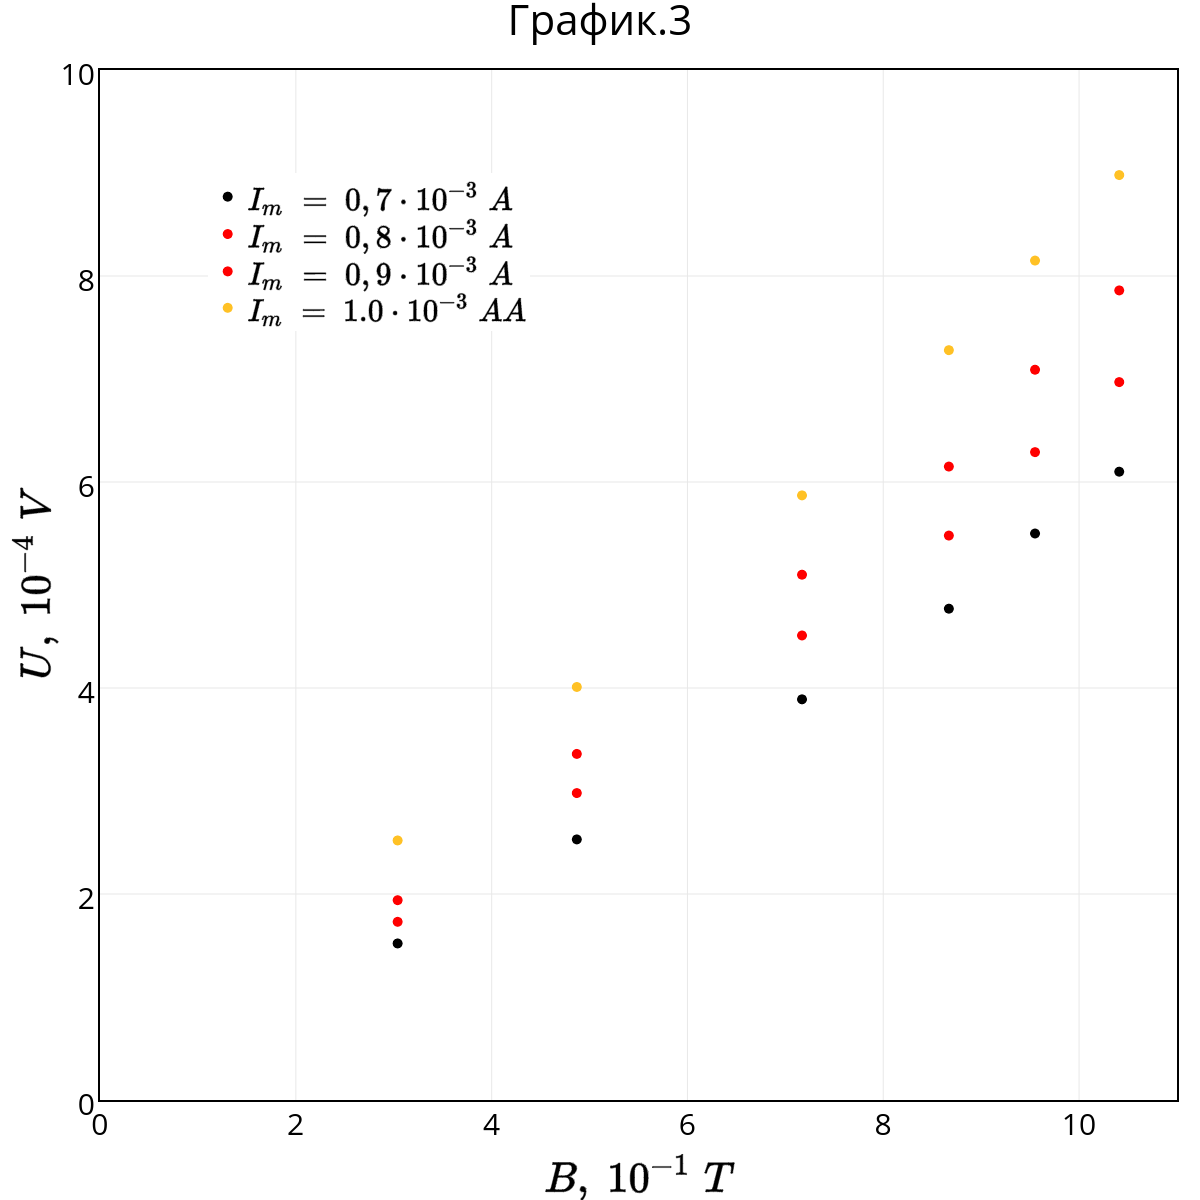

In [42]:
trace1 = go.Scatter(
    y = data['U5']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,7\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)
trace2 = go.Scatter(
    y = data['U6']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,8\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    )
)
trace3 = go.Scatter(
    y = data['U7']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,9\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    )
)

trace4 = go.Scatter(
    y = data['U9']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~1.0\cdot 10^{-3}~AA$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ffc125'
    )
)

trace0 = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=True,
    legend=dict(
        x=0.1,
        y=0.9
        #orientation= "h"
    ),
    title = "График.3",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$B,~10^{-1}~ T$',
        range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$U,~10^{-4}~V$',
        range = [0, 10],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 100,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3.png", width=500)

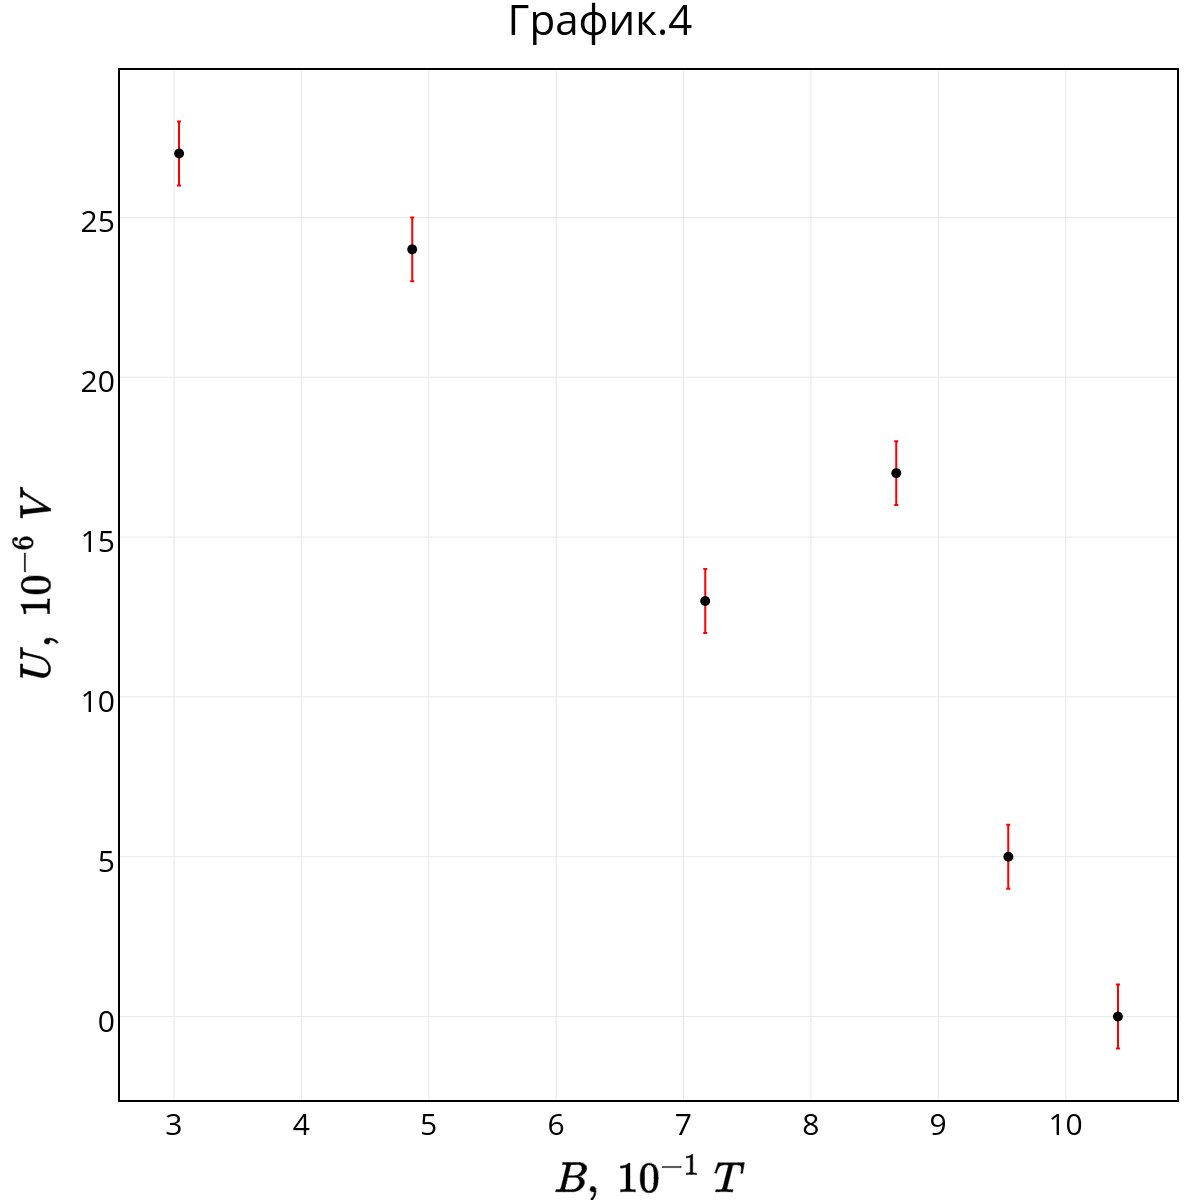

In [43]:
trace1 = go.Scatter(
    y = data['U9'] + data['U8'],
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~1.0~10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
    error_y = dict(
        type = 'constant',
        value = 1,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
)
trace0 = [trace1]

layout = go.Layout(
    showlegend=False,
    legend=dict(
        x=0.7,
        y=0.9
        #orientation= "h"
    ),
    title = "График.4",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$B,~10^{-1}~ T$',
        #range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$U,~10^{-6}~V$',
        #range = [0, 10],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot4.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot4.png", width=500)

In [44]:
data['U8']/100 - data['U9']/100

0   -17.96
1   -16.25
2   -14.39
3   -11.61
4    -7.78
5    -4.77
dtype: float64

In [45]:
data['U8'] = data['U8'] - 26
data['U9'] = data['U9'] - 31

#### Fit

In [46]:
Y = np.reshape(np.array(data['U1']), (1, len(np.array(data['U1']))))
X = np.reshape(np.array(data['B']), (1, len(np.array(data['B']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[  0.26875297 -23.28654071]
[ 0.0062425   4.82941867]


In [47]:
Y = np.reshape(np.array(data['U2']), (1, len(np.array(data['U2']))))
X = np.reshape(np.array(data['B']), (1, len(np.array(data['B']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[  0.35141121 -21.16973516]
[ 0.0074256   5.74470261]


In [48]:
Y = np.reshape(np.array(data['U3']), (1, len(np.array(data['U3']))))
X = np.reshape(np.array(data['B']), (1, len(np.array(data['B']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[  0.44322024 -31.55261305]
[  0.01386316  10.72503127]


In [49]:
Y = np.reshape(np.array(data['U4']), (1, len(np.array(data['U4']))))
X = np.reshape(np.array(data['B']), (1, len(np.array(data['B']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[  0.52641929 -34.49645584]
[  0.0169943   13.14738907]


In [50]:
Y = np.reshape(np.array(data['U5']), (1, len(np.array(data['U5']))))
X = np.reshape(np.array(data['B']), (1, len(np.array(data['B']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[  0.6174294 -44.6306477]
[  0.01795605  13.89143107]


In [51]:
Y = np.reshape(np.array(data['U6']), (1, len(np.array(data['U6']))))
X = np.reshape(np.array(data['B']), (1, len(np.array(data['B']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[  0.70204071 -45.43665391]
[  0.01678252  12.98355247]


In [52]:
Y = np.reshape(np.array(data['U7']), (1, len(np.array(data['U7']))))
X = np.reshape(np.array(data['B']), (1, len(np.array(data['B']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[  0.7916238 -51.6979385]
[  0.02011194  15.55930377]


In [53]:
Y = np.reshape(np.array(data['U8']), (1, len(np.array(data['U8']))))
X = np.reshape(np.array(data['B']), (1, len(np.array(data['B']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[ -0.90808404  36.37255451]
[  0.02218011  17.15931194]


In [54]:
Y = np.reshape(np.array(data['U9']), (1, len(np.array(data['U9']))))
X = np.reshape(np.array(data['B']), (1, len(np.array(data['B']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[  0.87386537 -54.11092183]
[  0.01834995  14.19617095]


k analysis

In [55]:
k = [0.268, 0.351, 0.443, 0.526, 0.617, 0.702, 0.791, 0.873]
b = [-23, -21, -31, -34, -44, -45, -51, -54]
err_k = [0.006, 0.007, 0.013, 0.017, 0.018, 0.017, 0.020, 0.018]
I = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
err_I = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

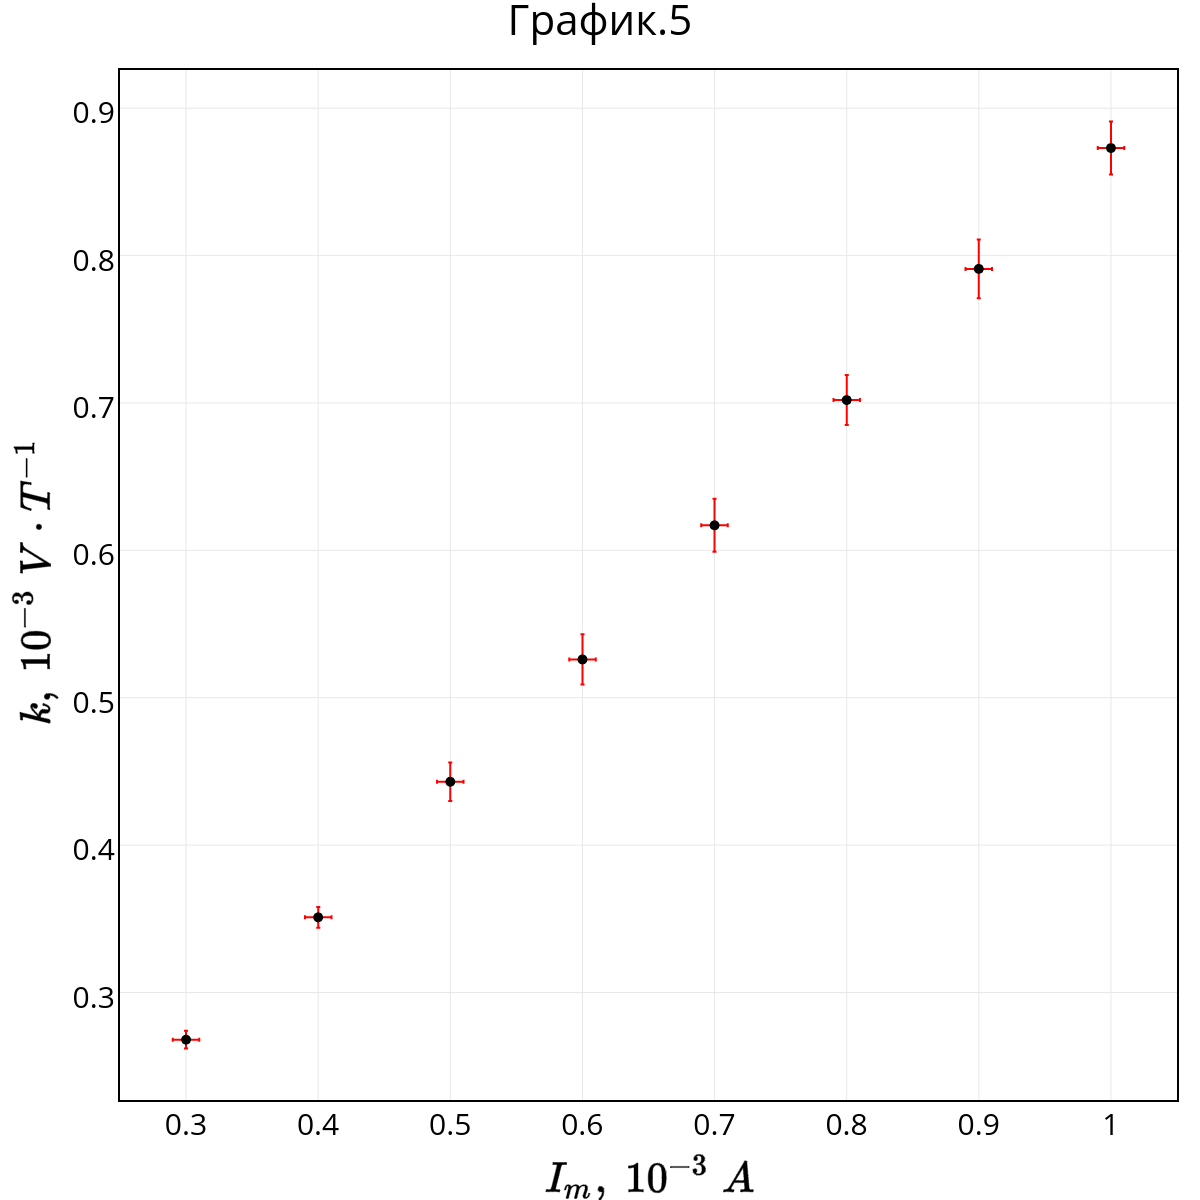

In [56]:
trace1 = go.Scatter(
    x = I,
    y = k,
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = err_k,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = err_I,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)


trace0 = [trace1]

layout = go.Layout(
    showlegend=False,
    legend=dict(
        #x=0.9,
        #y=1
        orientation= "h"
    ),
    title = "График.5",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$I_m,~10^{-3}~A$',
        #range = [0.0, 1.5],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$k,~10^{-3}~V\cdot T^{-1}$',
        #range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot5.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot5.png", width=500)

In [57]:
Y = k
X = I
def f(x, b):
    return b*x
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0], sigma = err_k, absolute_sigma=True)
parameters_opt_1 = parameters_opt_1[0]
parameters_sigma_1 = np.sqrt(np.diag(parameters_cov_1))[0]
print "y  = ({:.3f})*x".format(parameters_opt_1)
print "(+-)({:.3f})*x".format(parameters_sigma_1)

y  = (0.893)*x
(+-)(0.013)*x


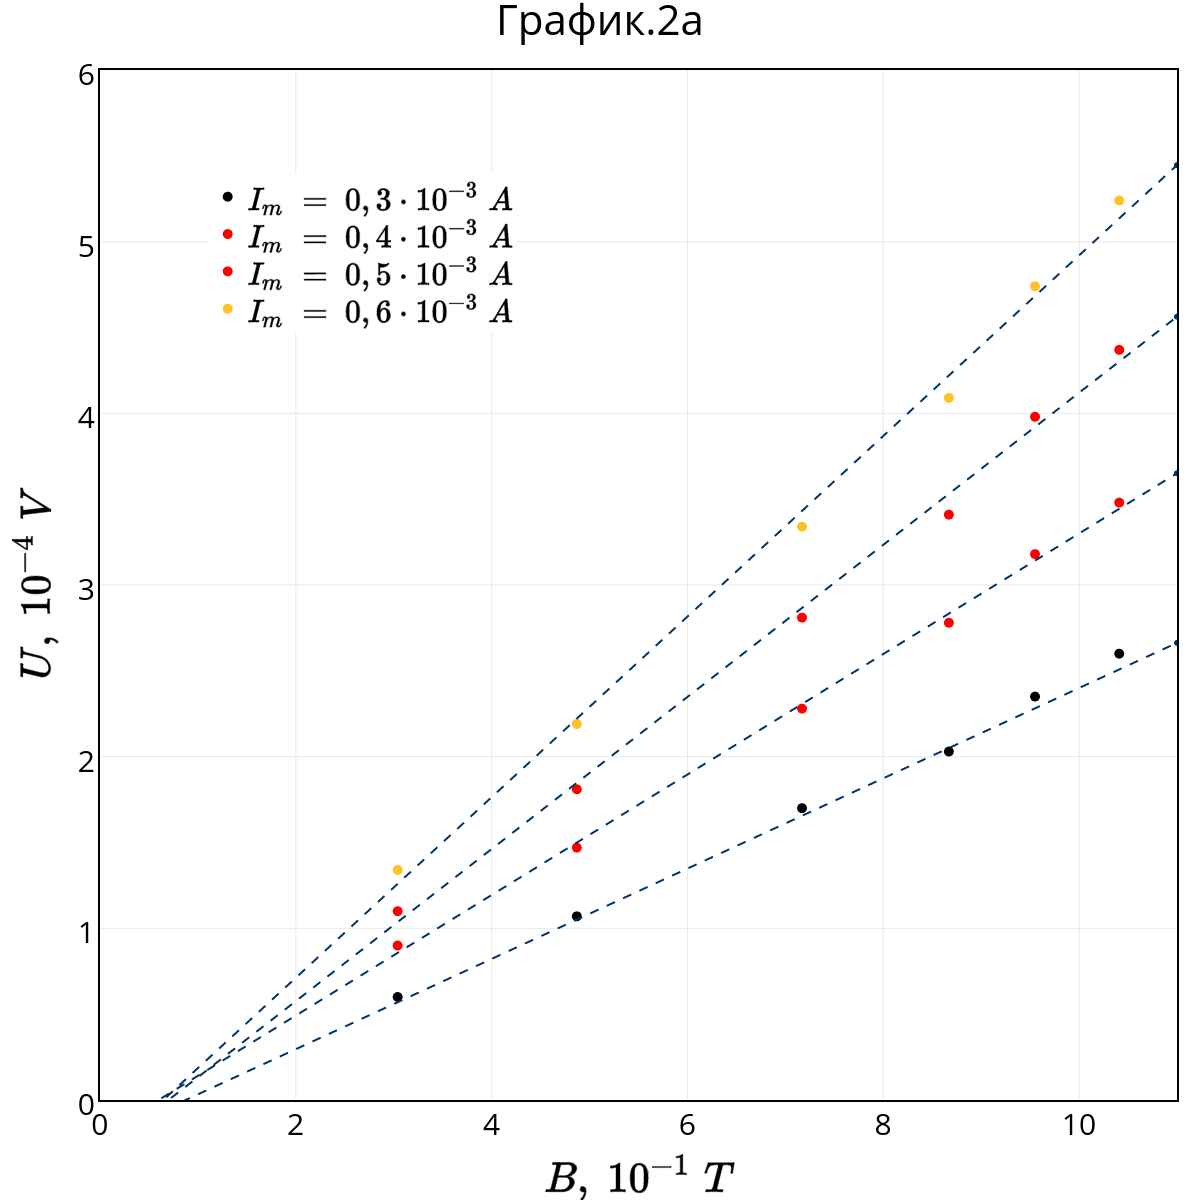

In [58]:
trace1 = go.Scatter(
    y = data['U1']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,3\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    )
)
trace2 = go.Scatter(
    y = data['U2']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,4\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    )
)
trace3 = go.Scatter(
    y = data['U3']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,5\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    )
)

trace4 = go.Scatter(
    y = data['U4']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,6\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ffc125'
    ),
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    )
)

trace1a = go.Scatter(
    x = [0.0, 1100/100],
    y = [-0.23, 1100*0.263/100 - 0.23],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)
trace2a = go.Scatter(
    x = [0.0, 1100/100],
    y = [-0.21, (1100*0.351)/100 - 0.21],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace3a = go.Scatter(
    x = [0.0, 1100/100],
    y = [-0.31, (1100*0.443)/100-0.31],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace4a = go.Scatter(
    x = [0.0, 1100/100],
    y = [-0.34, (1100*0.526)/100-0.34],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)



trace0 = [trace1, trace2, trace3, trace4, trace1a, trace2a, trace3a, trace4a]

layout = go.Layout(
    showlegend=True,
    legend=dict(
        x=0.1,
        y=0.9
        #orientation= "h"
    ),
    title = "График.2a",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$B,~10^{-1}~ T$',
        range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$U,~10^{-4}~V$',
        range = [0, 6],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 100,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2a.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2a.png", width=500)

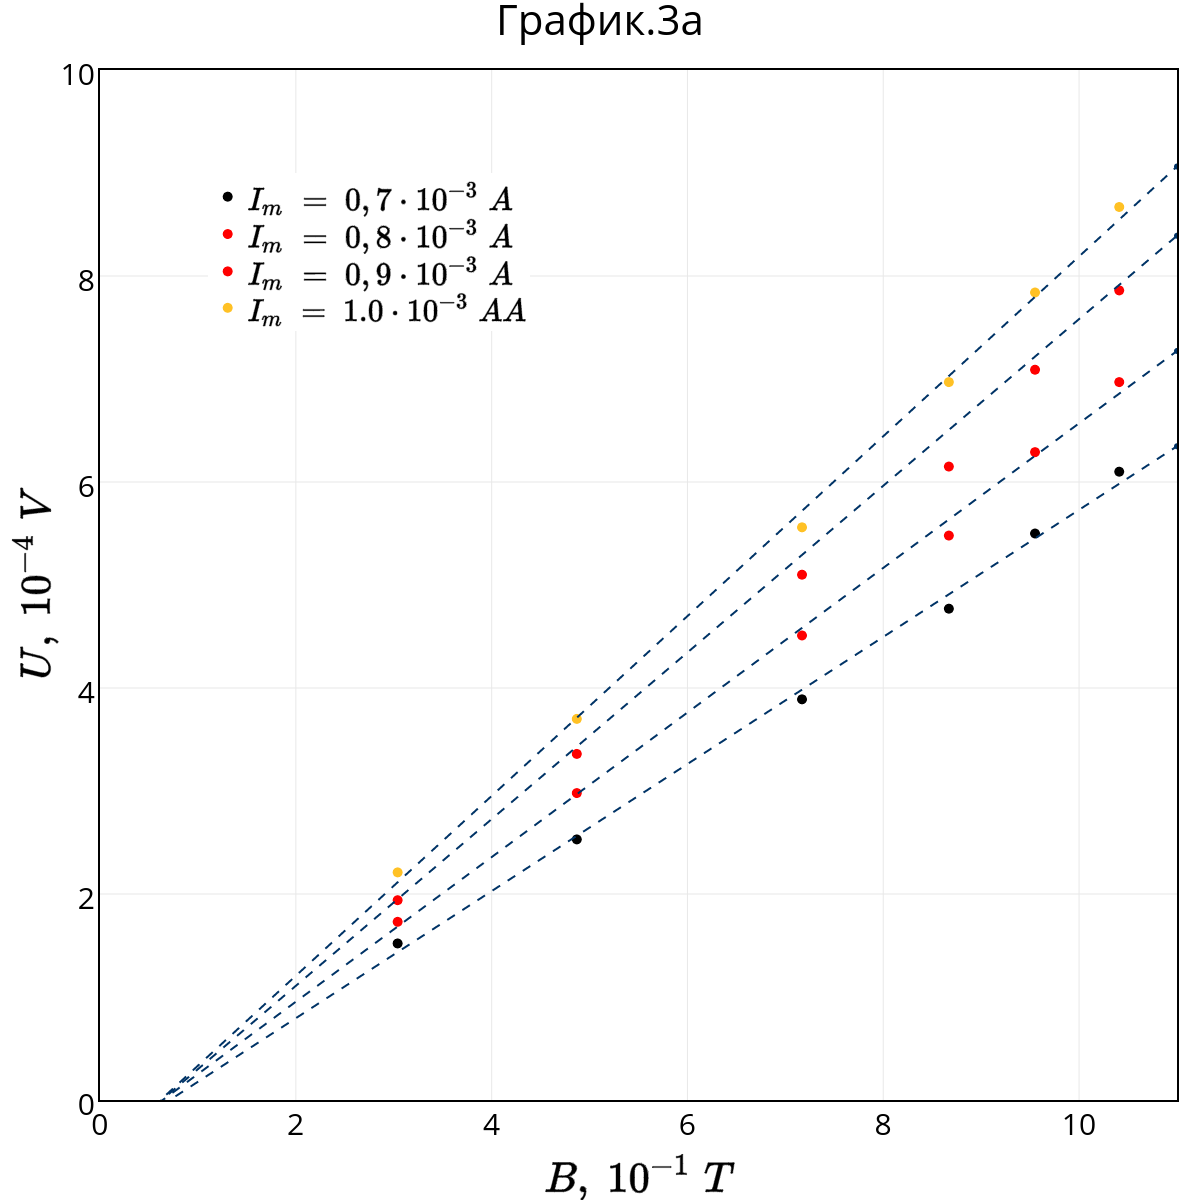

In [59]:
trace1 = go.Scatter(
    y = data['U5']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,7\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)
trace2 = go.Scatter(
    y = data['U6']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,8\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    )
)
trace3 = go.Scatter(
    y = data['U7']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,9\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    )
)

trace4 = go.Scatter(
    y = data['U9']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~1.0\cdot 10^{-3}~AA$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ffc125'
    )
)

trace1a = go.Scatter(
    x = [0.0, 1100/100],
    y = [-0.44, 1100*0.617/100 - 0.44],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)
trace2a = go.Scatter(
    x = [0.0, 1100/100],
    y = [-0.45, (1100*0.702)/100 - 0.45],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace3a = go.Scatter(
    x = [0.0, 1100/100],
    y = [-0.51, (1100*0.791)/100-0.31],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace4a = go.Scatter(
    x = [0.0, 1100/100],
    y = [-0.54, (1100*0.873)/100-0.54],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)



trace0 = [trace1, trace2, trace3, trace4, trace1a, trace2a, trace3a, trace4a]

layout = go.Layout(
    showlegend=True,
    legend=dict(
        x=0.1,
        y=0.9
        #orientation= "h"
    ),
    title = "График.3a",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$B,~10^{-1}~ T$',
        range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$U,~10^{-4}~V$',
        range = [0, 10],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 100,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3a.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3a.png", width=500)

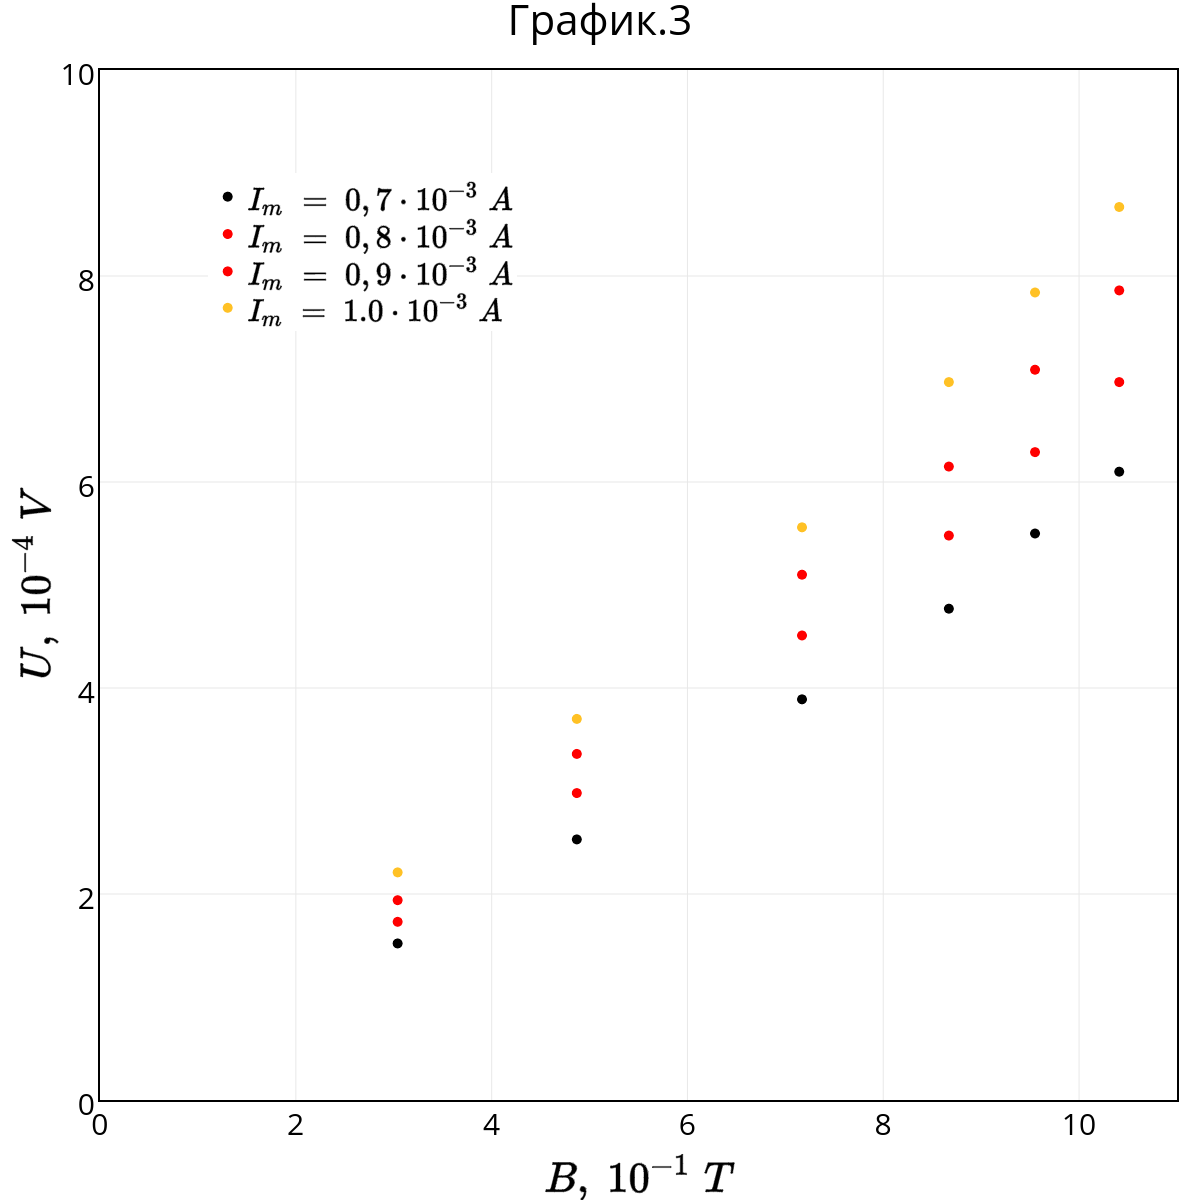

In [60]:
trace1 = go.Scatter(
    y = data['U5']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,7\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)
trace2 = go.Scatter(
    y = data['U6']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,8\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    )
)
trace3 = go.Scatter(
    y = data['U7']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~0,9\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    )
)

trace4 = go.Scatter(
    y = data['U9']/100,
    x = data['B']/100,
    mode = 'markers',
    name = '$I_m~=~1.0\cdot 10^{-3}~A$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ffc125'
    )
)

trace0 = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=True,
    legend=dict(
        x=0.1,
        y=0.9
        #orientation= "h"
    ),
    title = "График.3",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$B,~10^{-1}~ T$',
        range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$U,~10^{-4}~V$',
        range = [0, 10],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 100,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3.png", width=500)

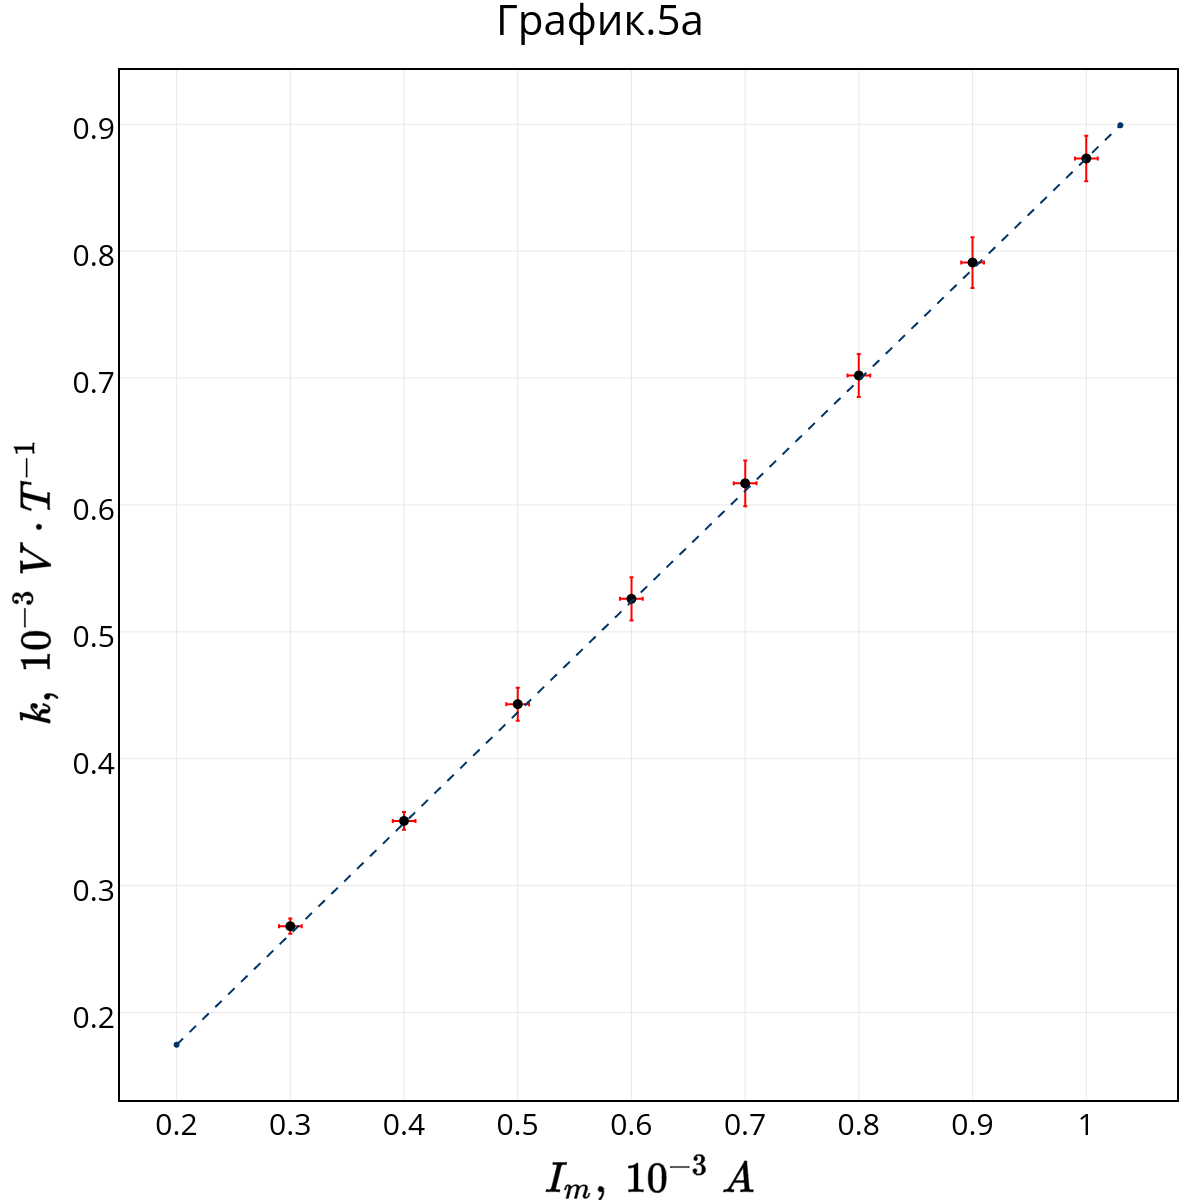

In [61]:
trace1 = go.Scatter(
    x = I,
    y = k,
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = err_k,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = err_I,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)

trace1a = go.Scatter(
    x = [0.2, 1.03],
    y = [0.873*0.2, 0.873*1.03],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace1a]

layout = go.Layout(
    showlegend=False,
    legend=dict(
        #x=0.9,
        #y=1
        orientation= "h"
    ),
    title = "График.5a",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$I_m,~10^{-3}~A$',
        #range = [0.2, 1.2],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$k,~10^{-3}~V\cdot T^{-1}$',
        #range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot5a.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot5a.png", width=500)

$$ n = (698 \pm 70) \times 10^{19} \cdot m^{-3} $$

$$ b = (3482 \pm 118)~cm^2 \cdot V^{-1} \cdot s^{-1} $$

In [ ]:
# Ответы актуальны с точностью до систематической и случайной ошибки